# 20MAI0005_Abhishek_Kumar

# Association Rule Mining

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

Based on the concept of strong rules, Rakesh Agrawal, Tomasz Imieliński and Arun Swami introduced association rules for discovering regularities between products in large-scale transaction data recorded by point-of-sale (POS) systems in supermarkets. For example, the rule {\displaystyle \{\mathrm {onions,potatoes} \}\Rightarrow \{\mathrm {burger} \}}\{{\mathrm  {onions,potatoes}}\}\Rightarrow \{{\mathrm  {burger}}\} found in the sales data of a supermarket would indicate that if a customer buys onions and potatoes together, they are likely to also buy hamburger meat. Such information can be used as the basis for decisions about marketing activities such as, e.g., promotional pricing or product placements.

In addition to the above example from market basket analysis association rules are employed today in many application areas including Web usage mining, intrusion detection, continuous production, and bioinformatics. In contrast with sequence mining, association rule learning typically does not consider the order of items either within a transaction or across transactions.

# Apriori algorithm

Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

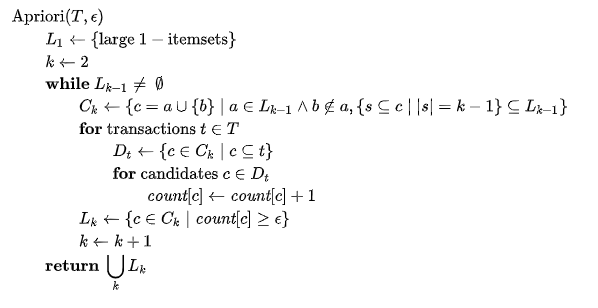

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [3]:
#importing dataset
df = pd.read_csv('retail_dataset.csv', sep=',') 

In [4]:
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [5]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [6]:
#Data Preprocessing
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [7]:
#Applying Apriori Alogorthim library
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 159 combinations | Sampling itemset size 3


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Eggs)
3,0.501587,(Cheese)
4,0.361905,(Pencil)
5,0.504762,(Bread)
6,0.476190,(Meat)


In [8]:
#Mining Association Rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624


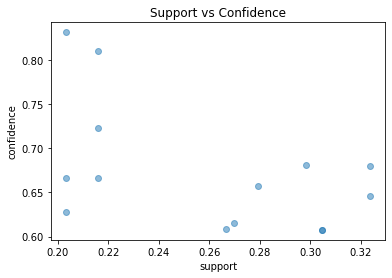

In [9]:
# Support vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

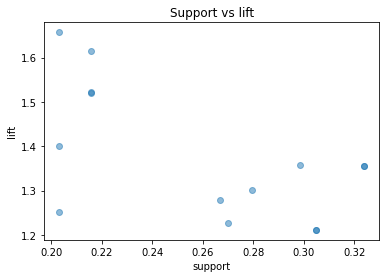

In [10]:
#Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

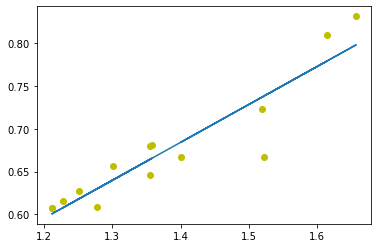

In [11]:
#Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# FP Growth Method

FP stands for frequent pattern.

In the first pass, the algorithm counts the occurrences of items (attribute-value pairs) in the dataset of transactions, and stores these counts in a 'header table'. In the second pass, it builds the FP-tree structure by inserting transactions into a trie.

Items in each transaction have to be sorted by descending order of their frequency in the dataset before being inserted so that the tree can be processed quickly. Items in each transaction that do not meet the minimum support requirement are discarded. If many transactions share most frequent items, the FP-tree provides high compression close to tree root.

Recursive processing of this compressed version of the main dataset grows frequent item sets directly, instead of generating candidate items and testing them against the entire database (as in the apriori algorithm).

Growth begins from the bottom of the header table i.e. the item with the smallest support by finding all sorted transactions that end in that item. Call this item {\displaystyle I}I.

A new conditional tree is created which is the original FP-tree projected onto {\displaystyle I}I. The supports of all nodes in the projected tree are re-counted with each node getting the sum of its children counts. Nodes (and hence subtrees) that do not meet the minimum support are pruned. Recursive growth ends when no individual items conditional on {\displaystyle I}I meet the minimum support threshold. The resulting paths from root to {\displaystyle I}I will be frequent itemsets. After this step, processing continues with the next least-supported header item of the original FP-tree.

Once the recursive process has completed, all frequent item sets will have been found, and association rule creation begins.

In [12]:
#Creating a simple dataset
dataset = [['Milk', 'Eggs', 'Bread'],
['Milk', 'Eggs'],
['Milk', 'Bread'],
['Eggs', 'Apple']]

In [13]:
print(dataset)

[['Milk', 'Eggs', 'Bread'], ['Milk', 'Eggs'], ['Milk', 'Bread'], ['Eggs', 'Apple']]


In [14]:
#Convert list into dataframe iwth boolean values
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)

In [15]:
print(df)

   Apple  Bread   Eggs   Milk
0  False   True   True   True
1  False  False   True   True
2  False   True  False   True
3   True  False   True  False


In [16]:
#Find frequently occurring itemsets using F-P Growth
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fp=fpgrowth(df, min_support=0.01, use_colnames=True)

In [17]:
print(frequent_itemsets_fp)

   support             itemsets
0     0.75               (Milk)
1     0.75               (Eggs)
2     0.50              (Bread)
3     0.25              (Apple)
4     0.50         (Eggs, Milk)
5     0.50        (Bread, Milk)
6     0.25        (Bread, Eggs)
7     0.25  (Bread, Eggs, Milk)
8     0.25        (Apple, Eggs)


In [18]:
#Mining the Association rules
from mlxtend.frequent_patterns import association_rules

rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [19]:
print(rules_fp)

     antecedents consequents  antecedent support  consequent support  support  \
0        (Bread)      (Milk)                0.50                0.75     0.50   
1  (Bread, Eggs)      (Milk)                0.25                0.75     0.25   
2        (Apple)      (Eggs)                0.25                0.75     0.25   

   confidence      lift  leverage  conviction  
0         1.0  1.333333    0.1250         inf  
1         1.0  1.333333    0.0625         inf  
2         1.0  1.333333    0.0625         inf  


# Limitations

Apriori, while historically significant, suffers from a number of inefficiencies or trade-offs, which have spawned other algorithms. Candidate generation generates large numbers of subsets (The algorithm attempts to load up the candidate set, with as many as possible subsets before each scan of the database). Bottom-up subset exploration (essentially a breadth-first traversal of the subset lattice) finds any maximal subset S only after all {\displaystyle 2^{|S|}-1}2^{{|S|}}-1 of its proper subsets.

The algorithm scans the database too many times, which reduces the overall performance. Due to this, the algorithm assumes that the database is permanently in the memory.

Also, both the time and space complexity of this algorithm are very high: {\displaystyle O(2^{|D|})}{\displaystyle O(2^{|D|})}, thus exponential, where {\displaystyle |D|}|D| is the horizontal width (the total number of items) present in the database.

Later algorithms such as Max-Miner try to identify the maximal frequent item sets without enumerating their subsets, and perform "jumps" in the search space rather than a purely bottom-up approach.